In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('data.csv')

In [22]:
# Add a new column 'PRICE' to the DataFrame using the 'TARGET' variable values
df['target'] = df['MEDV']

# # Drop the 'TARGET' column
df.drop(columns=['MEDV'], inplace=True)

In [23]:
# check for missing values
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)

# fill missing values with mean
df.fillna(df.mean(), inplace=True)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [24]:
# check for duplicates
print(df.duplicated().sum())

# drop duplicates
df.drop_duplicates(inplace=True)

0


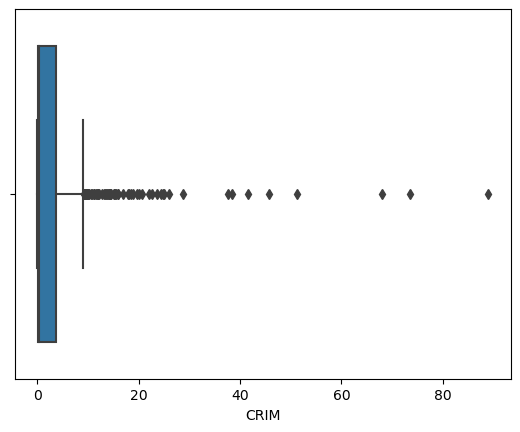

In [25]:
# identify outliers using boxplot
sns.boxplot(x=df['CRIM'])

# remove outliers using z-score
from scipy import stats
z_scores = stats.zscore(df['CRIM'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [26]:
# drop irrelevant features
df = df.drop(['RAD', 'CHAS'], axis=1)

In [27]:
# # add a categorical feature as an example
# df['CHAS'] = pd.Categorical.from_codes(df['CHAS'], ['no', 'yes'])

# # use one-hot encoding to convert the categorical feature to numerical
# df = pd.get_dummies(df, columns=['CHAS'])

In [28]:
from sklearn.preprocessing import StandardScaler
X = df.drop('target', axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     498 non-null    float64
 1   ZN       498 non-null    float64
 2   INDUS    498 non-null    float64
 3   NOX      498 non-null    float64
 4   RM       498 non-null    float64
 5   AGE      498 non-null    float64
 6   DIS      498 non-null    float64
 7   TAX      498 non-null    int64  
 8   PTRATIO  498 non-null    float64
 9   B        498 non-null    float64
 10  LSTAT    498 non-null    float64
 11  target   498 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 50.6 KB


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('target', axis=1)
y = df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [34]:
# Predict the median value of owner-occupied homes for the testing set
y_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean squared error: 7.49
RMSE: 2.7368790677704466
R-squared: 0.8938603723335814


In [37]:
# Create a random forest with 500 trees, a max depth of 5, and a minimum of 10 samples per leaf
rf = RandomForestRegressor(n_estimators=500, max_depth=5, min_samples_leaf=10)

# Fit the random forest to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

#Compute the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8363814628447065


In [88]:
# # Define a new set of input features
# new_features = [[0, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98]]
# predicted_price = rf.predict(new_features)
# print("Predicted price:", predicted_price)